In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the credits data
credits_df = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")

# Load the movies data
movies_df = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

In [3]:
# Get the number of rows and columns for credits_df
credits_rows, credits_cols = credits_df.shape

# Get the number of rows and columns for movies_df
movies_rows, movies_cols = movies_df.shape

# Print the total number of rows and columns for both CSV files
print("Credits CSV:")
print("Total rows:", credits_rows)
print("Total columns:", credits_cols)
print("\nMovies CSV:")
print("Total rows:", movies_rows)
print("Total columns:", movies_cols)

Credits CSV:
Total rows: 4803
Total columns: 4

Movies CSV:
Total rows: 4803
Total columns: 20


Let's examine the credits first

In [123]:
credits_df.head()

,movie_id,title,cast,crew,lead_actor
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Sam Worthington
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Johnny Depp
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Daniel Craig
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christian Bale
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Taylor Kitsch


In [67]:
import json
def get_actor_with_order_zero(cast_data):
    cast_list = json.loads(cast_data)
    actor_with_order_zero = next((actor for actor in cast_list if actor['order'] == 0), None)
    return actor_with_order_zero['name'] if actor_with_order_zero else None


In [68]:
# Apply the function to the cast column
credits_df['lead_actor'] = credits_df['cast'].apply(get_actor_with_order_zero)

# Display the updated DataFrame
credits_df[['cast', 'lead_actor']].head()


,cast,lead_actor
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",Sam Worthington
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Johnny Depp
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Daniel Craig
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",Christian Bale
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",Taylor Kitsch


In [5]:
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


##  Credits Data Cleaning 

In [6]:
credits_df.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [7]:
credits_df[credits_df.duplicated()]

,movie_id,title,cast,crew


In [8]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
data_sql=credits_df.copy()

## Top 10 movies by cast size

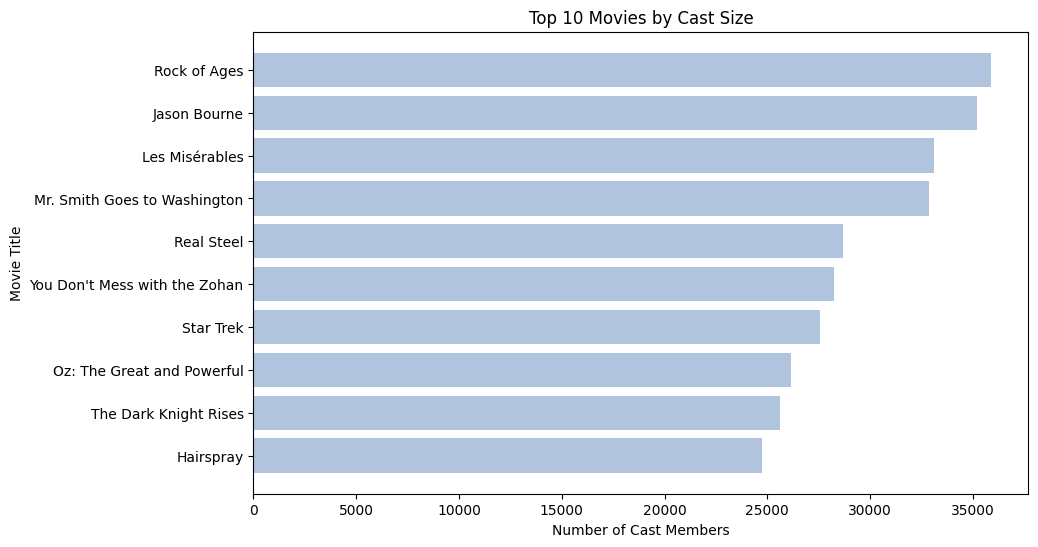

In [10]:


# data visualization

# Extracting top 10 movies based on the number of cast members

# Function to get the number of cast members
get_cast_size = lambda cast_list: len(cast_list)

data_sql['cast_size'] = data_sql['cast'].apply(get_cast_size)
top_10_cast_size = data_sql.nlargest(10, 'cast_size')[['title', 'cast_size']]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_cast_size['title'], top_10_cast_size['cast_size'], color='lightsteelblue')
plt.xlabel('Number of Cast Members')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Cast Size')
plt.gca().invert_yaxis()  # To display the movie with the highest cast at the top
plt.show()



## Top 10 movies by crew size

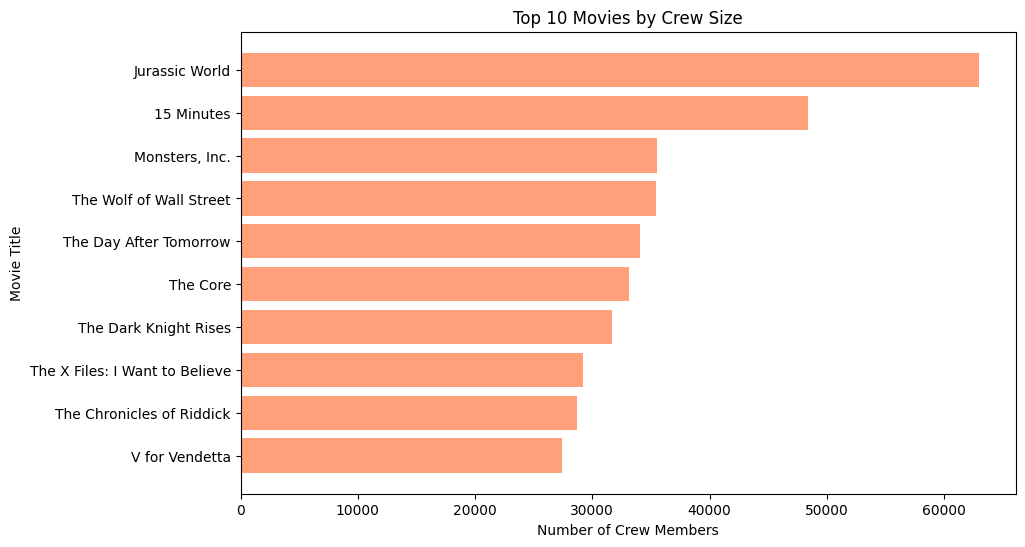

In [11]:
# Extracting top 10 movies based on the number of crew members

# Function to get the number of crew members
def get_crew_size(crew_list):
    return len(crew_list)

data_sql['crew_size'] = data_sql['crew'].apply(get_crew_size)
top_10_crew_size = data_sql.nlargest(10, 'crew_size')[['title', 'crew_size']]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_crew_size['title'], top_10_crew_size['crew_size'], color='lightsalmon')
plt.xlabel('Number of Crew Members')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Crew Size')
plt.gca().invert_yaxis()  # To display the movie with the highest crew at the top
plt.show()

## Now, let's examine the movies

In [12]:
movies_df.production_countries[2]

'[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]'

In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## How many unique items on each row


In [14]:
movies_df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

## Statistics

In [15]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Movies Data Cleaning


### Drop Unnecessary Colmuns


In [16]:
# I will not use these columns in my notebook
droped_colmuns = ['homepage','keywords', 'tagline']
movies_df.drop(columns=droped_colmuns, inplace=True)

### Check For Duplicates


In [17]:
movies_df[movies_df.duplicated()]

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count


### Handeling nan values


In [18]:
# Counting nans
movies_df.isna().sum()

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Let's remove rows with missing values

In [19]:
# Dop NaN Values Because they are not a lot
movies_df.dropna(inplace=True)

### Handeling Pipeline sperated values


## Data Visualization

In [20]:
movies_df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'],
      dtype='object')

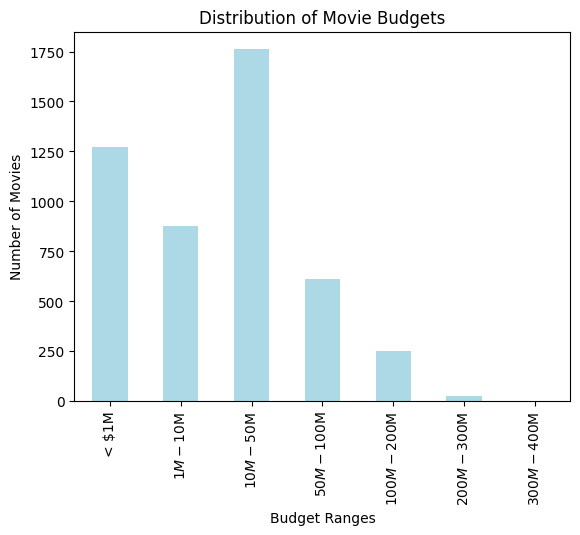

In [21]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

# Remove rows where budget is NaN
movies_df = movies_df.dropna(subset=['budget'])

# Define bins for the budget based on the range provided
bins = [0, 1e6, 1e7, 5e7, 1e8, 2e8, 3e8, 4e8]
bin_labels = ['< $1M', '$1M - $10M', '$10M - $50M', '$50M - $100M', '$100M - $200M', '$200M - $300M', '$300M - $400M']

# Create a new column with binned budget values
movies_df['budget_binned'] = pd.cut(movies_df['budget'], bins=bins, labels=bin_labels, include_lowest=True)

# Count the number of movies in each budget bin for the entire dataset
binned_counts = movies_df['budget_binned'].value_counts().sort_index()

# Plot the distribution of the binned budget values for the entire dataset
binned_counts.plot(kind='bar', color='lightblue')

# Adding labels and title for better readability
plt.xlabel('Budget Ranges')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Budgets')
plt.show()

In [23]:
final_df = pd.concat([credits_df,movies_df],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   movie_id              4803 non-null   int64   
 1   title                 4803 non-null   object  
 2   cast                  4803 non-null   object  
 3   crew                  4803 non-null   object  
 4   budget                4799 non-null   float64 
 5   genres                4799 non-null   object  
 6   id                    4799 non-null   float64 
 7   original_language     4799 non-null   object  
 8   original_title        4799 non-null   object  
 9   overview              4799 non-null   object  
 10  popularity            4799 non-null   float64 
 11  production_companies  4799 non-null   object  
 12  production_countries  4799 non-null   object  
 13  release_date          4799 non-null   object  
 14  revenue               4799 non-null   float64 
 15  runt

In [24]:


movies= final_df[['original_title','crew','release_date','genres','popularity','production_companies',
                   'production_countries','revenue','budget','runtime','vote_average']]
movies.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4799 non-null   object 
 1   crew                  4803 non-null   object 
 2   release_date          4799 non-null   object 
 3   genres                4799 non-null   object 
 4   popularity            4799 non-null   float64
 5   production_companies  4799 non-null   object 
 6   production_countries  4799 non-null   object 
 7   revenue               4799 non-null   float64
 8   budget                4799 non-null   float64
 9   runtime               4799 non-null   float64
 10  vote_average          4799 non-null   float64
dtypes: float64(5), object(6)
memory usage: 412.9+ KB


In [145]:
movies['profit'] = movies['revenue'] - movies['budget']

In [111]:
def extract_genre_names(genre_data):
    genres = [genre['name'] for genre in eval(genre_data)]
    return genres

# Extract genre names
movies_df['genre_names'] = movies_df['genres'].apply(extract_genre_names)

# Print the DataFrame with genre names
print(movies_df[['genres', 'genre_names']])

                                                 genres  \
0     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...                                                 ...   
4798  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801                                                 []   
4802                [{"id": 99, "name": "Documentary"}]   

                                        genre_names  
0     [Action, Adventure, Fantasy, Science Fiction]  
1                      [Adventure, Fantasy, Action]  
2                        [Action, Adventure, Crime]  
3                  [Action, Crime, Drama, Thriller]  
4              [Actio

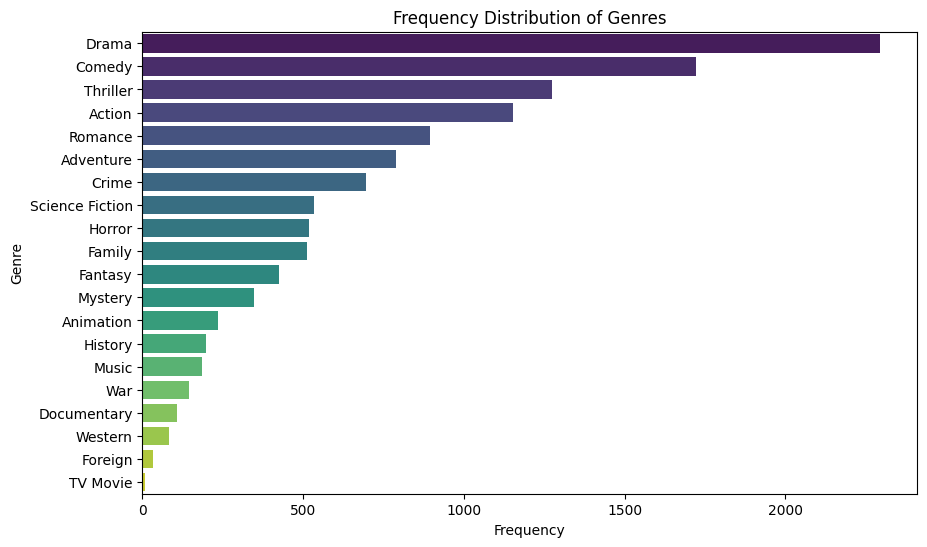

In [112]:
# Flatten the list of genre names
all_genres = [genre for sublist in movies_df['genre_names'] for genre in sublist]

# Create a DataFrame for genre frequency
genre_freq_df = pd.DataFrame(all_genres, columns=['genre'])
genre_freq_df = genre_freq_df['genre'].value_counts().reset_index()
genre_freq_df.columns = ['genre', 'frequency']

# Plot the frequency distribution of genres
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='genre', data=genre_freq_df, palette='viridis')
plt.title('Frequency Distribution of Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

In [71]:
def get_first_production_company(production_data):
    production_list = json.loads(production_data)
    first_company = production_list[0] if production_list else None
    return first_company['name'] if first_company else None

In [72]:
# Apply the function to the production_companies column
movies_df['first_production_company'] = movies_df['production_companies'].apply(get_first_production_company)

# Display the updated DataFrame
print(movies_df[['original_title', 'first_production_company']])

                                original_title  first_production_company
0                                       Avatar   Ingenious Film Partners
1     Pirates of the Caribbean: At World's End      Walt Disney Pictures
2                                      Spectre         Columbia Pictures
3                        The Dark Knight Rises        Legendary Pictures
4                                  John Carter      Walt Disney Pictures
...                                        ...                       ...
4798                               El Mariachi         Columbia Pictures
4799                                 Newlyweds                      None
4800                 Signed, Sealed, Delivered     Front Street Pictures
4801                          Shanghai Calling                      None
4802                         My Date with Drew  rusty bear entertainment

[4799 rows x 2 columns]


In [70]:
movies_df["production_companies"][1]

'[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Jerry Bruckheimer Films", "id": 130}, {"name": "Second Mate Productions", "id": 19936}]'

## Top 10 movies with most revenue


In [26]:
revenue_movies = movies.sort_values('revenue',ascending=False)[:10]

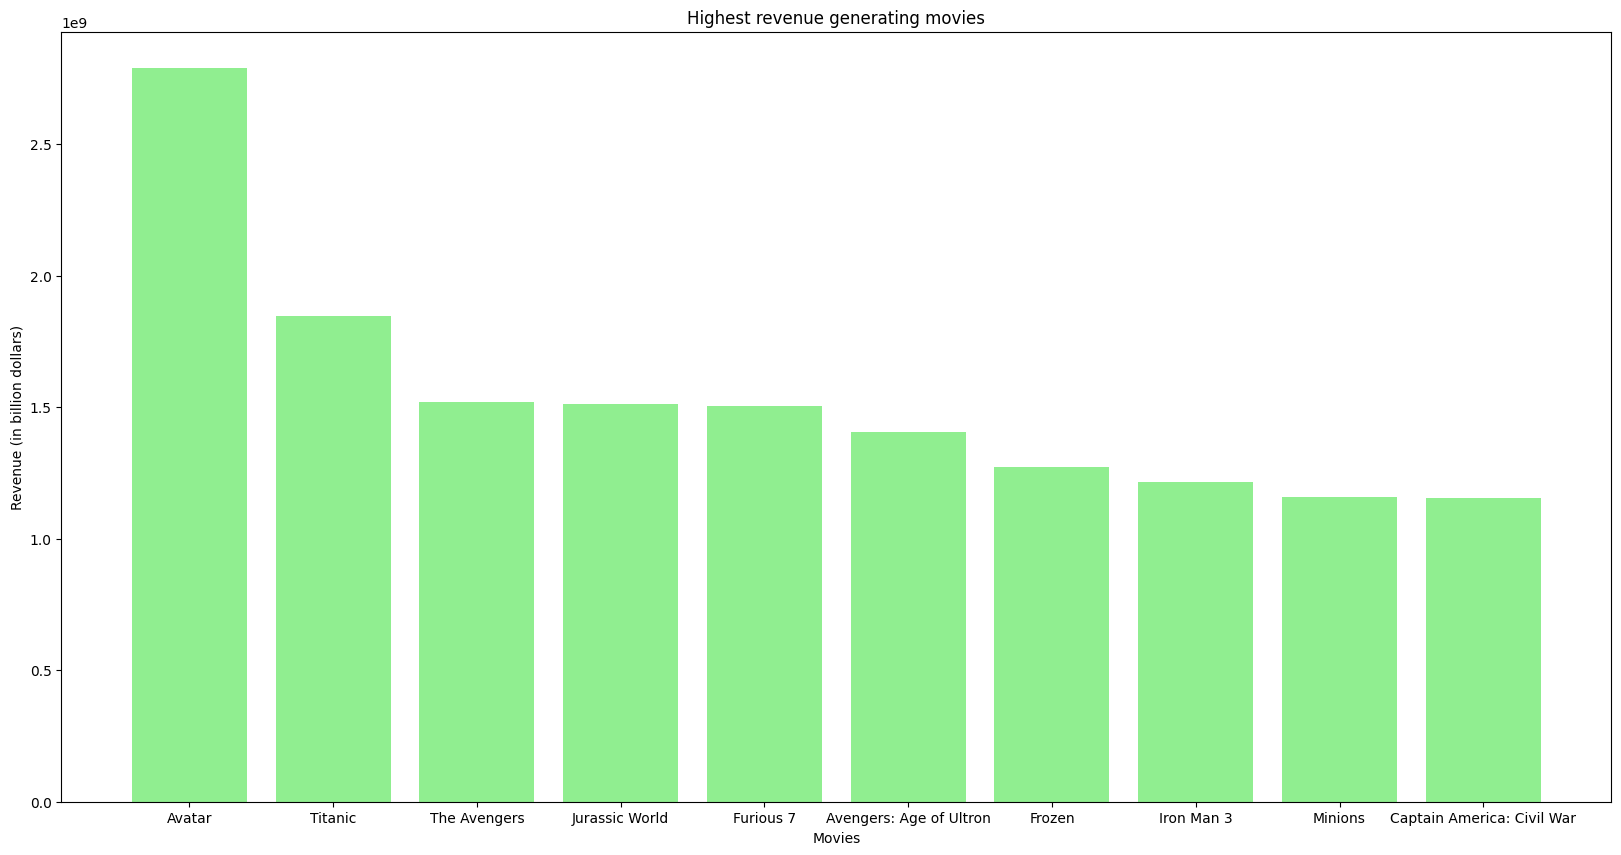

In [27]:
plt.figure(figsize=(20,10))
plt.bar(revenue_movies['original_title'], revenue_movies['revenue'], color='lightgreen')
plt.title('Highest revenue generating movies')
plt.xlabel('Movies')
plt.ylabel('Revenue (in billion dollars)')
plt.xticks(rotation=0)
plt.show()

In [162]:
profit_movies = movies.sort_values('profit',ascending=False)[:10]

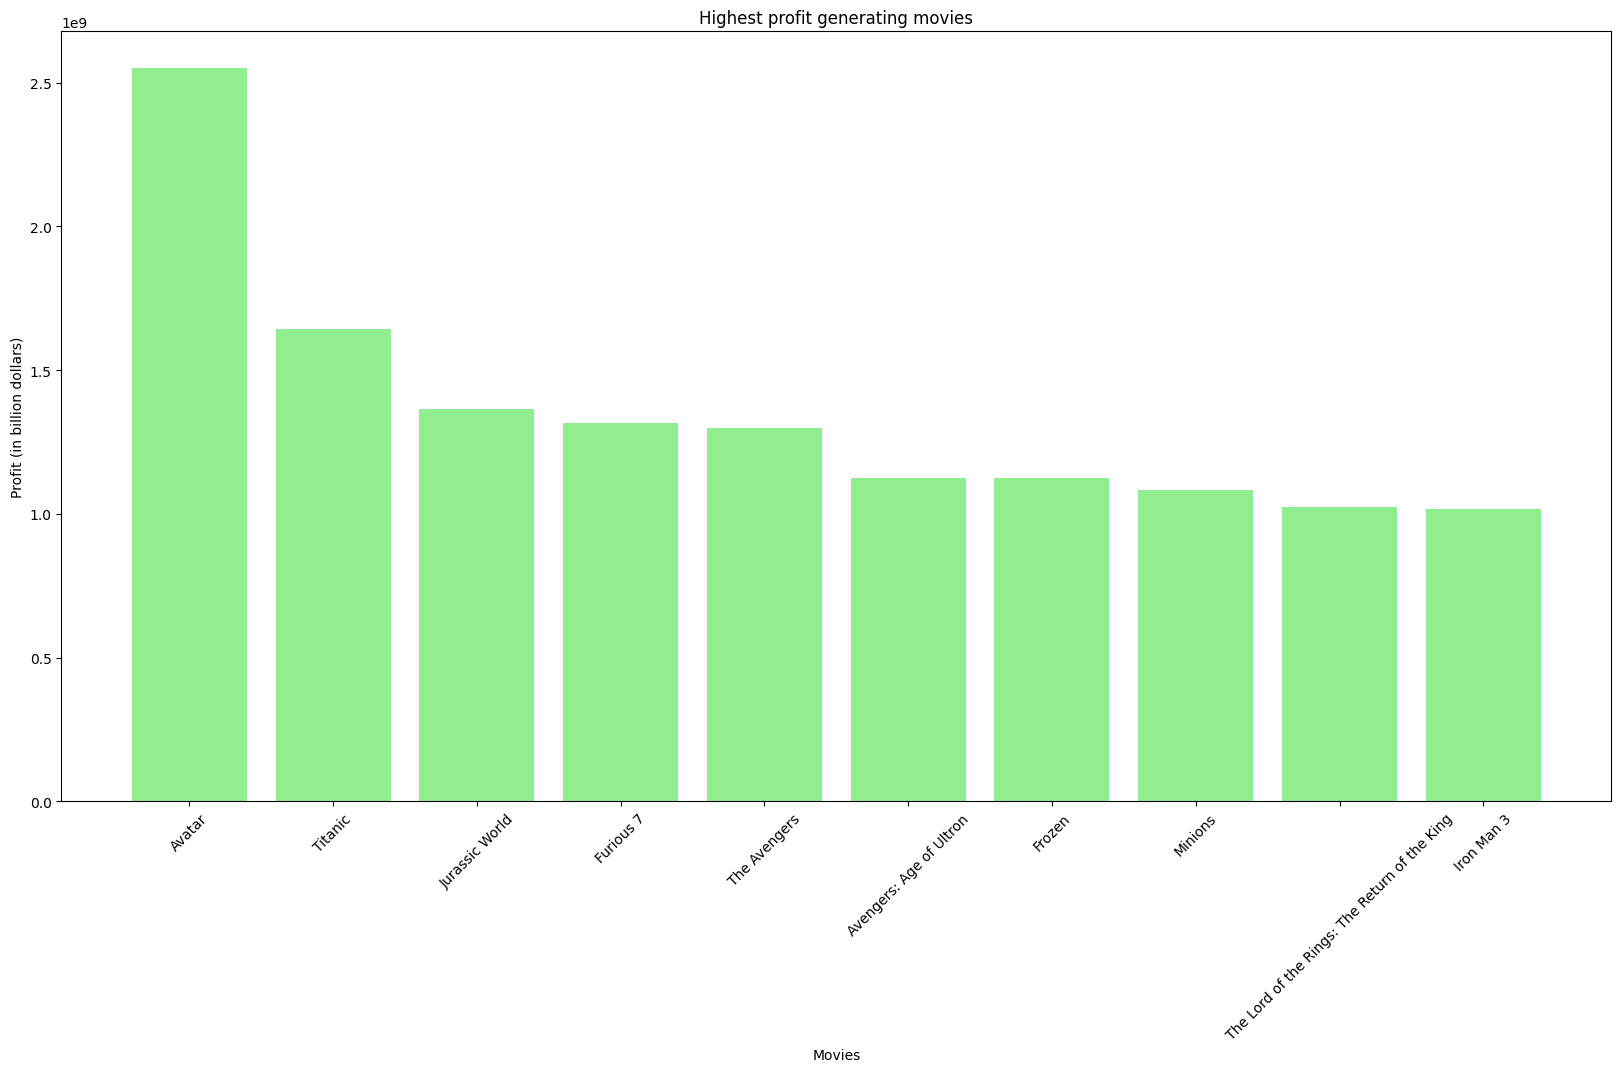

In [29]:
plt.figure(figsize=(20,10))
plt.bar(profit_movies['original_title'], profit_movies['profit'], color='lightgreen')
plt.title('Highest profit generating movies')
plt.xlabel('Movies')
plt.ylabel('Profit (in billion dollars)')
plt.xticks(rotation=45)
plt.show()

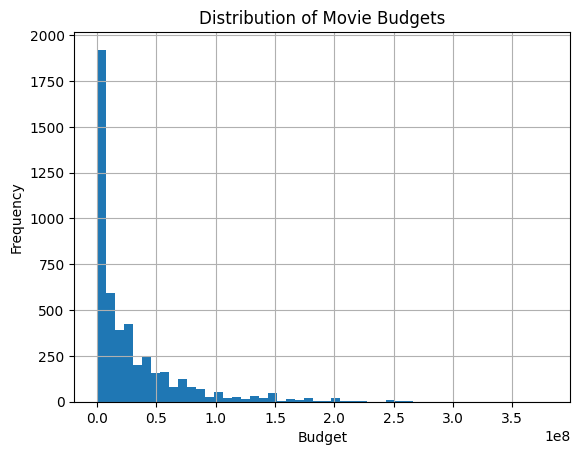

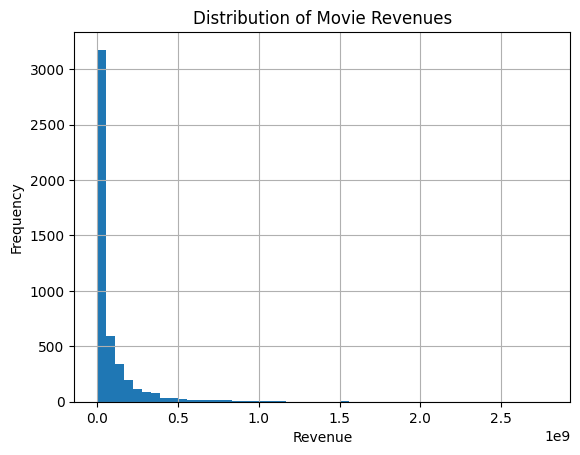

In [31]:
movies_df['budget'].hist(bins=50)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

movies_df['revenue'].hist(bins=50)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


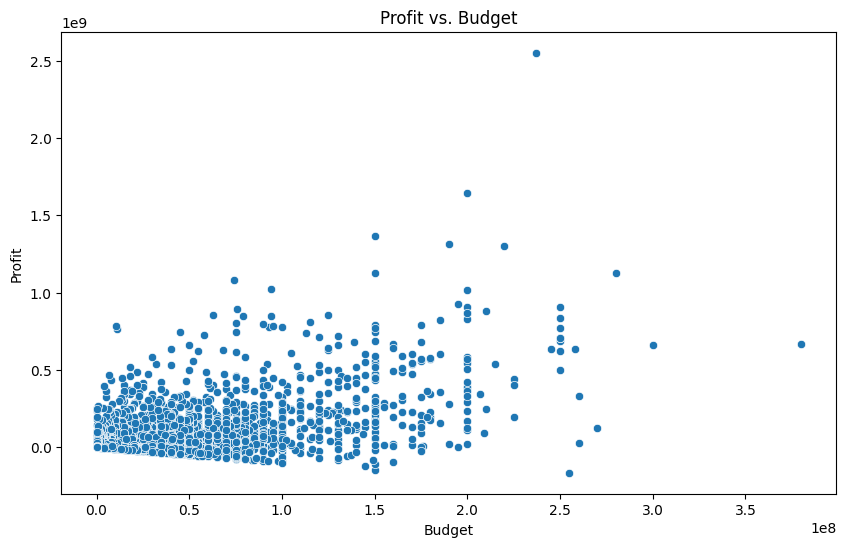

In [155]:
# Calculate profit
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='budget', y='profit')
plt.title('Profit vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()


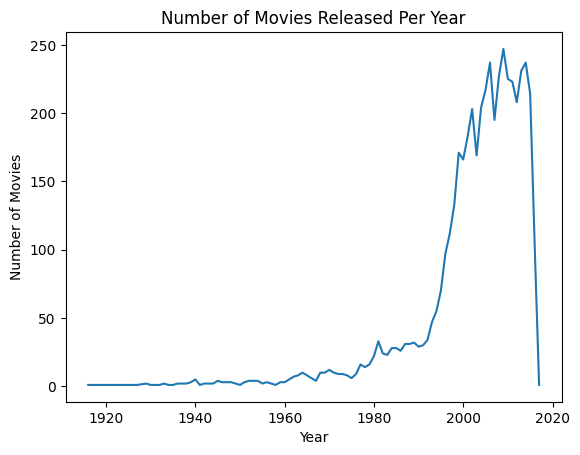

In [38]:
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_per_year = movies_df['release_date'].dt.year.value_counts().sort_index()

plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


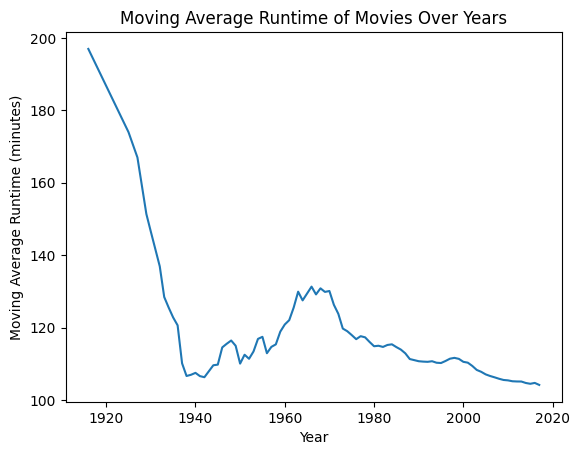

In [119]:
# Apply moving average
window_size = 10  # Choose an appropriate window size
moving_average = average_runtime_per_year.rolling(window=window_size, min_periods=1).mean()

# Plotting
plt.plot(average_runtime_per_year.index, moving_average.values)
plt.title('Moving Average Runtime of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Moving Average Runtime (minutes)')
plt.show()


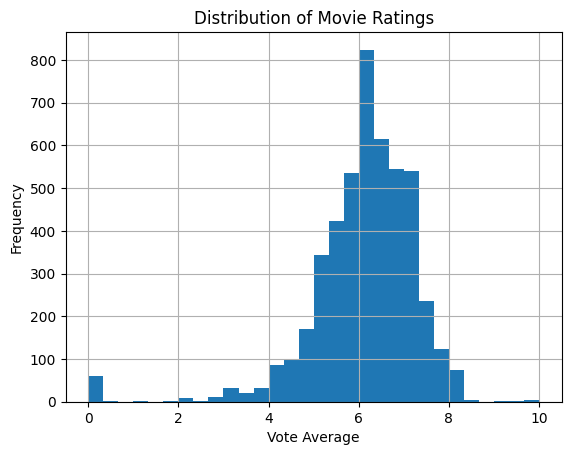

In [161]:
movies_df['vote_average'].hist(bins=30)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

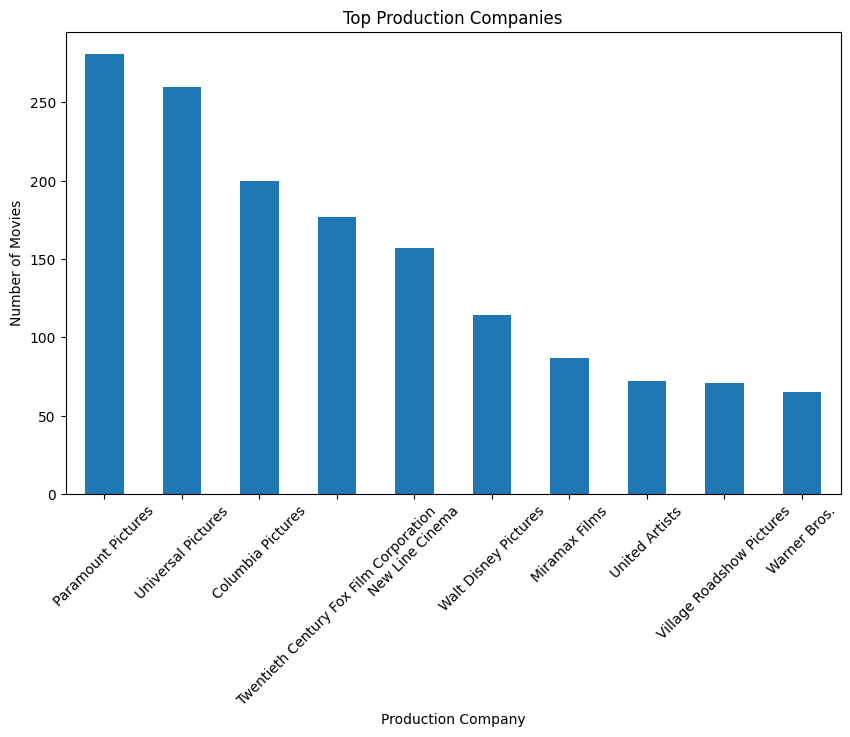

In [78]:
# Count the number of movies for each production company
production_company_counts = movies_df['first_production_company'].value_counts()

# Select the top 10 production companies
top_10_production_companies = production_company_counts.nlargest(10)

# Plot the data
plt.figure(figsize=(10, 6))
top_10_production_companies.plot(kind='bar')
plt.title('Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

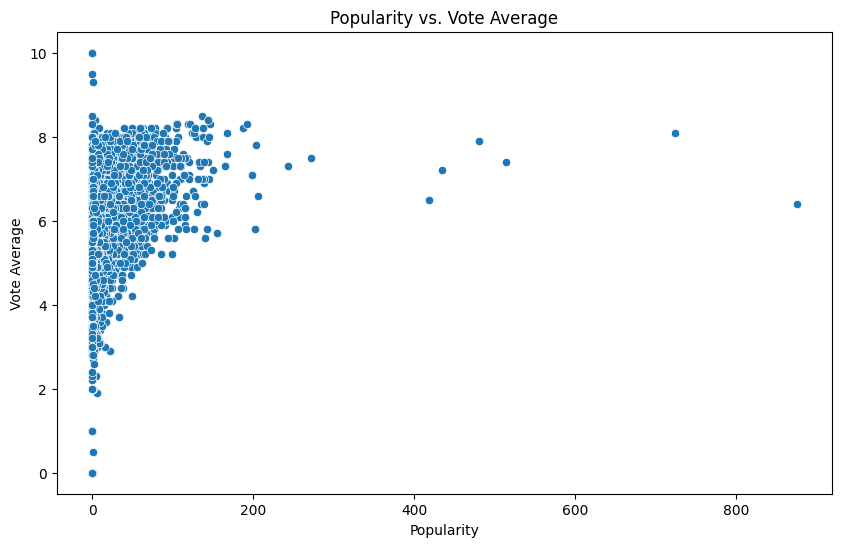

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='popularity', y='vote_average')
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

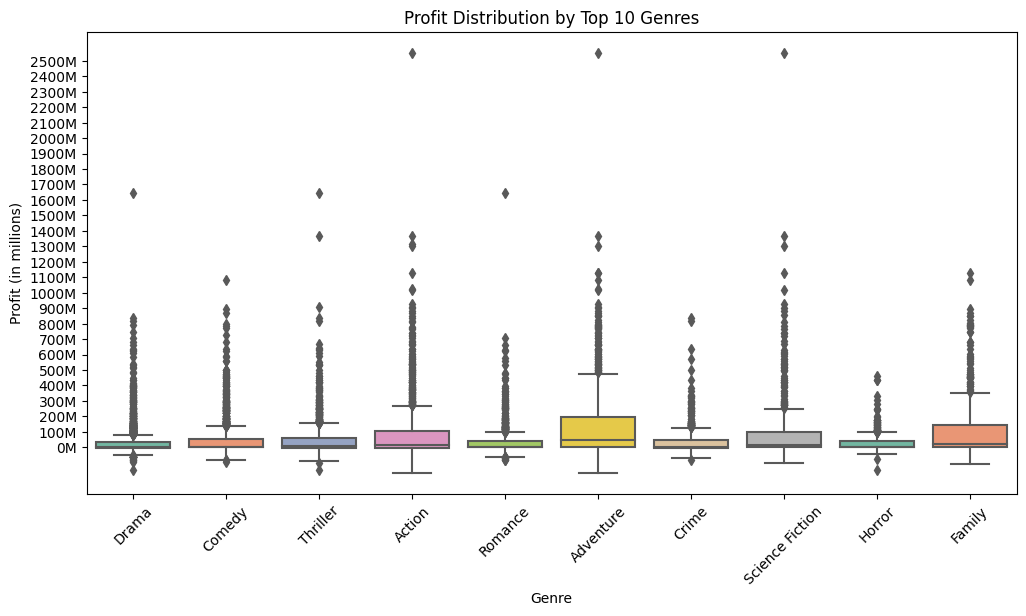

In [154]:
# Define the interval between y-ticks
y_tick_interval = profit_scale*100

# Plot the profit distribution by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre_names', y='profit', data=genre_profit_top10, order=top_genres, palette='Set2')
plt.title('Profit Distribution by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Profit (in millions)')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max_ytick + 1, y_tick_interval), 
           labels=[f'{int(val/profit_scale)}M' for val in np.arange(0, max_ytick + 1, y_tick_interval)])
plt.show()


In [81]:
# Group by the first production company and sum the profits
profits_by_company = movies_df.groupby('first_production_company')['profit'].sum()

# Get the top 10 profit-making companies
top_10_companies = profits_by_company.nlargest(10)

print(top_10_companies)

first_production_company
Paramount Pictures                        25864176348
Universal Pictures                        24149649106
Walt Disney Pictures                      19099976048
Columbia Pictures                         17248419968
Twentieth Century Fox Film Corporation    16289176277
New Line Cinema                            8541312705
DreamWorks SKG                             7129749688
Village Roadshow Pictures                  6937016155
Lucasfilm                                  5810309700
Marvel Studios                             5551826201
Name: profit, dtype: int64


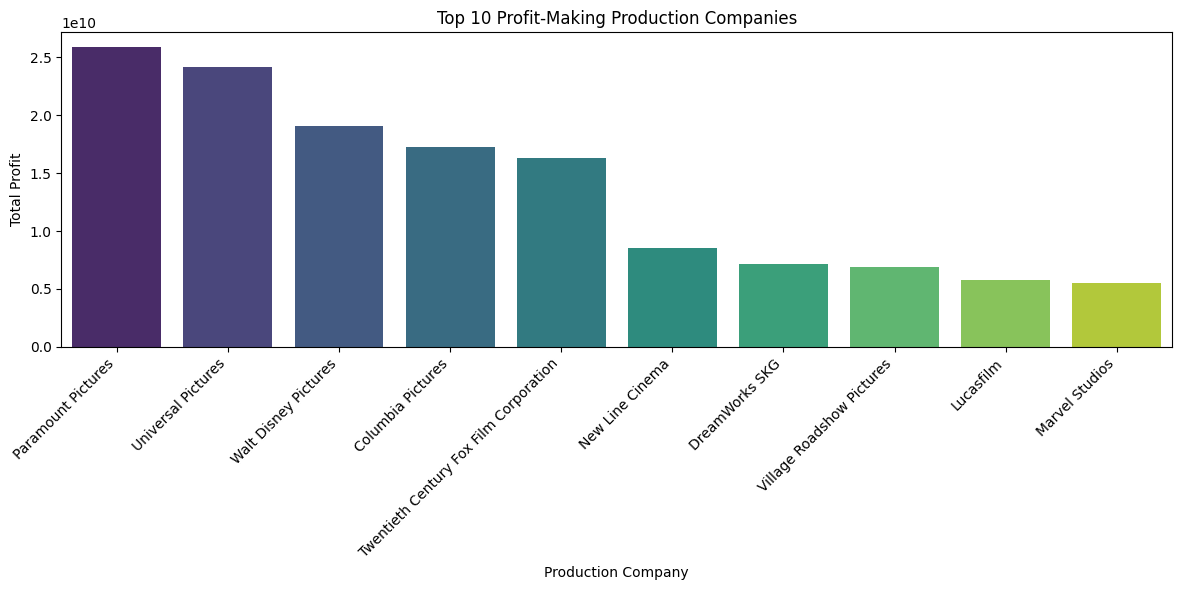

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_companies.index, y=top_10_companies.values, palette='viridis')
plt.title('Top 10 Profit-Making Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


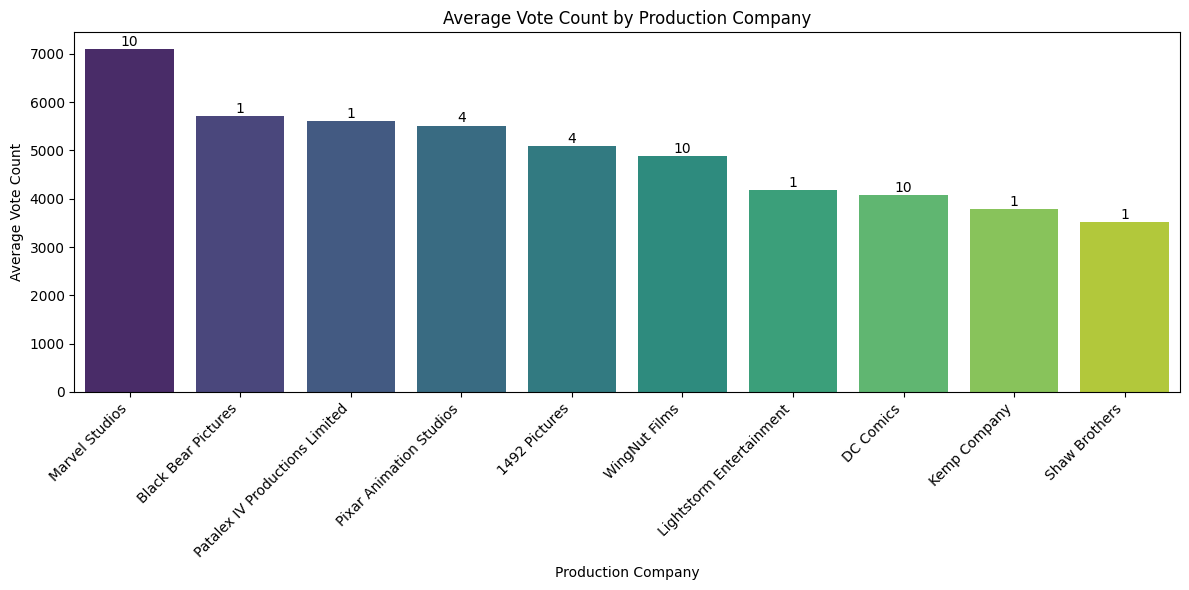

In [156]:
# Group by 'first_production_company' and calculate average vote count and total number of movies
average_vote_count = movies_df.groupby('first_production_company')['vote_count'].mean().sort_values(ascending=False)
total_movies = movies_df['first_production_company'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_vote_count.index[:10], y=average_vote_count.values[:10], palette='viridis')

# Add total number of movies on top of bars
for i, v in enumerate(total_movies[average_vote_count.index[:10]]):
    ax.text(i, average_vote_count.values[i] + 0.1, str(v), ha='center', va='bottom')

plt.title('Average Vote Count by Production Company')
plt.xlabel('Production Company')
plt.ylabel('Average Vote Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


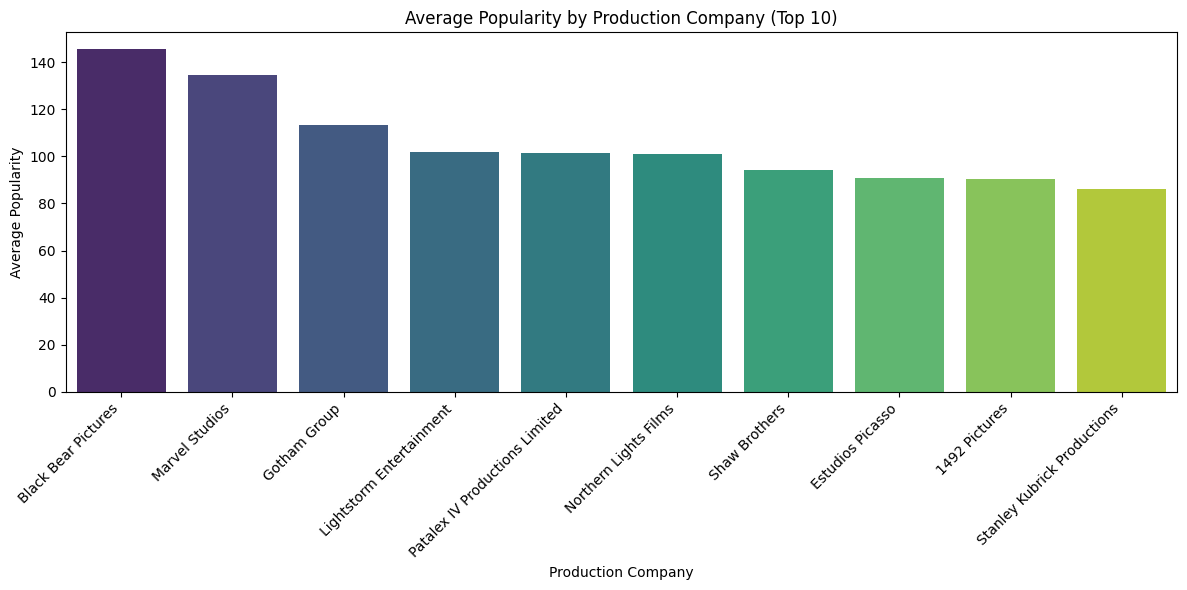

In [157]:
# Group by 'first_production_company' and calculate average popularity
average_popularity = movies_df.groupby('first_production_company')['popularity'].mean().sort_values(ascending=False)

# Select the top N production companies based on popularity
top_n_companies = average_popularity.index[:10]

# Filter the DataFrame for only the top N production companies
top_n_df = movies_df[movies_df['first_production_company'].isin(top_n_companies)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_df, x='first_production_company', y='popularity', estimator='mean',ci=None, order=top_n_companies, palette='viridis')
plt.title('Average Popularity by Production Company (Top 10)')
plt.xlabel('Production Company')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

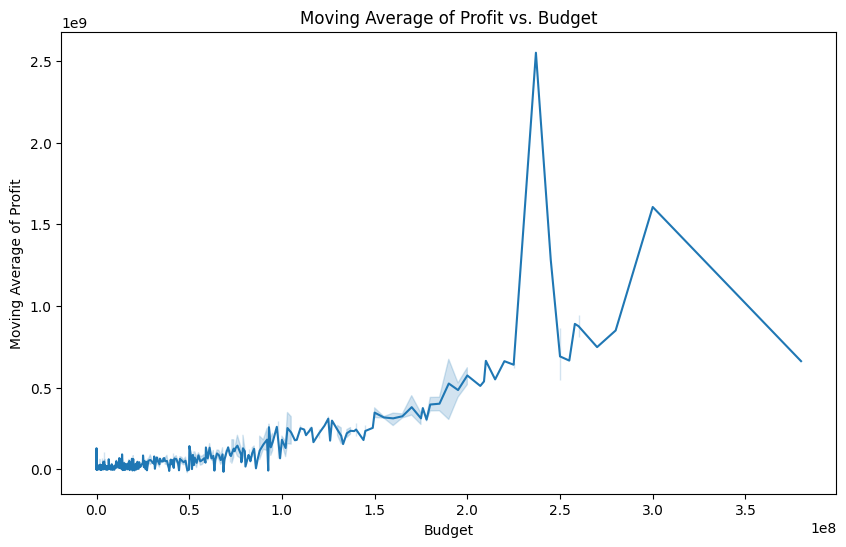

In [106]:
# Applying moving average to profit data
window = 20  # Adjust window size as needed
movies_df['profit_ma'] = movies_df['profit'].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=movies_df, x='budget', y='profit_ma')
plt.title('Moving Average of Profit vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Moving Average of Profit')
plt.show()


In [133]:
# Assuming 'production_countries' is a column in movies_df containing JSON strings
country_names = movies_df['production_countries'].apply(lambda x: [country['name'] for country in json.loads(x)])

# Flatten the list of country names
all_countries = [country for sublist in country_names for country in sublist]

# Get the top 10 countries by frequency
top_countries = pd.Series(all_countries).value_counts().nlargest(10)

print(top_countries)


United States of America    3956
United Kingdom               635
Germany                      324
France                       306
Canada                       261
Australia                    110
Italy                         71
Spain                         71
China                         59
Japan                         58
Name: count, dtype: int64


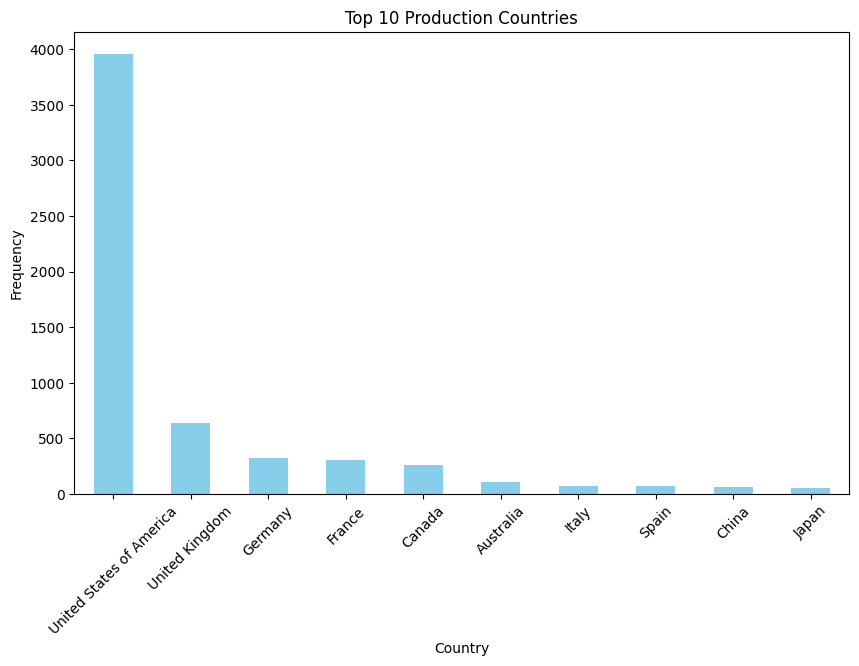

In [134]:
# Plotting
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Production Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

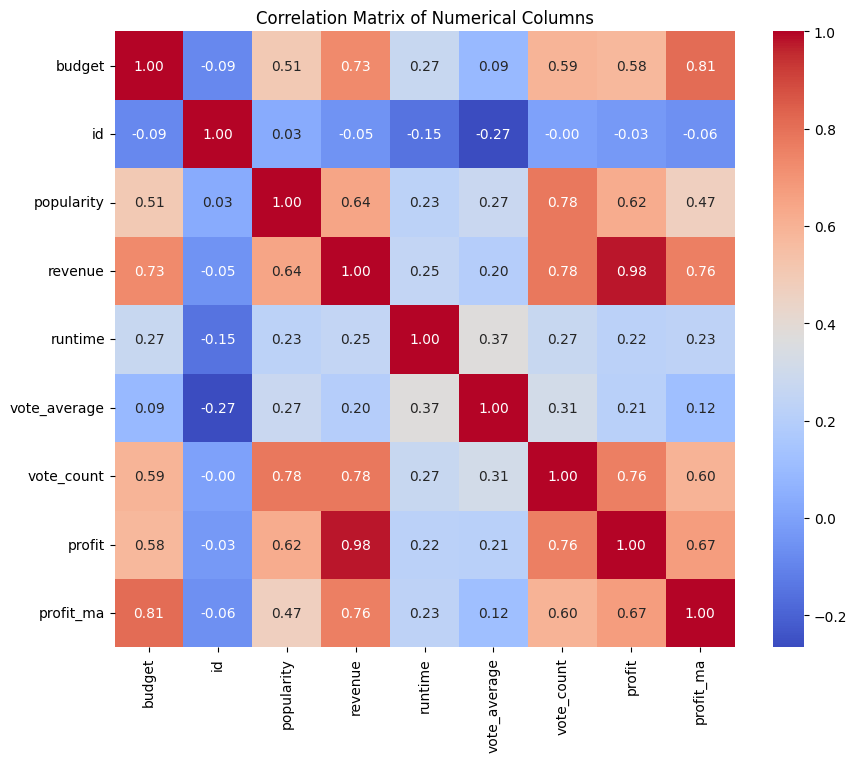

In [164]:
# Selecting only numerical columns
numerical_columns = movies_df.select_dtypes(include=['number'])

# Calculating correlation matrix
correlation_matrix = numerical_columns.corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

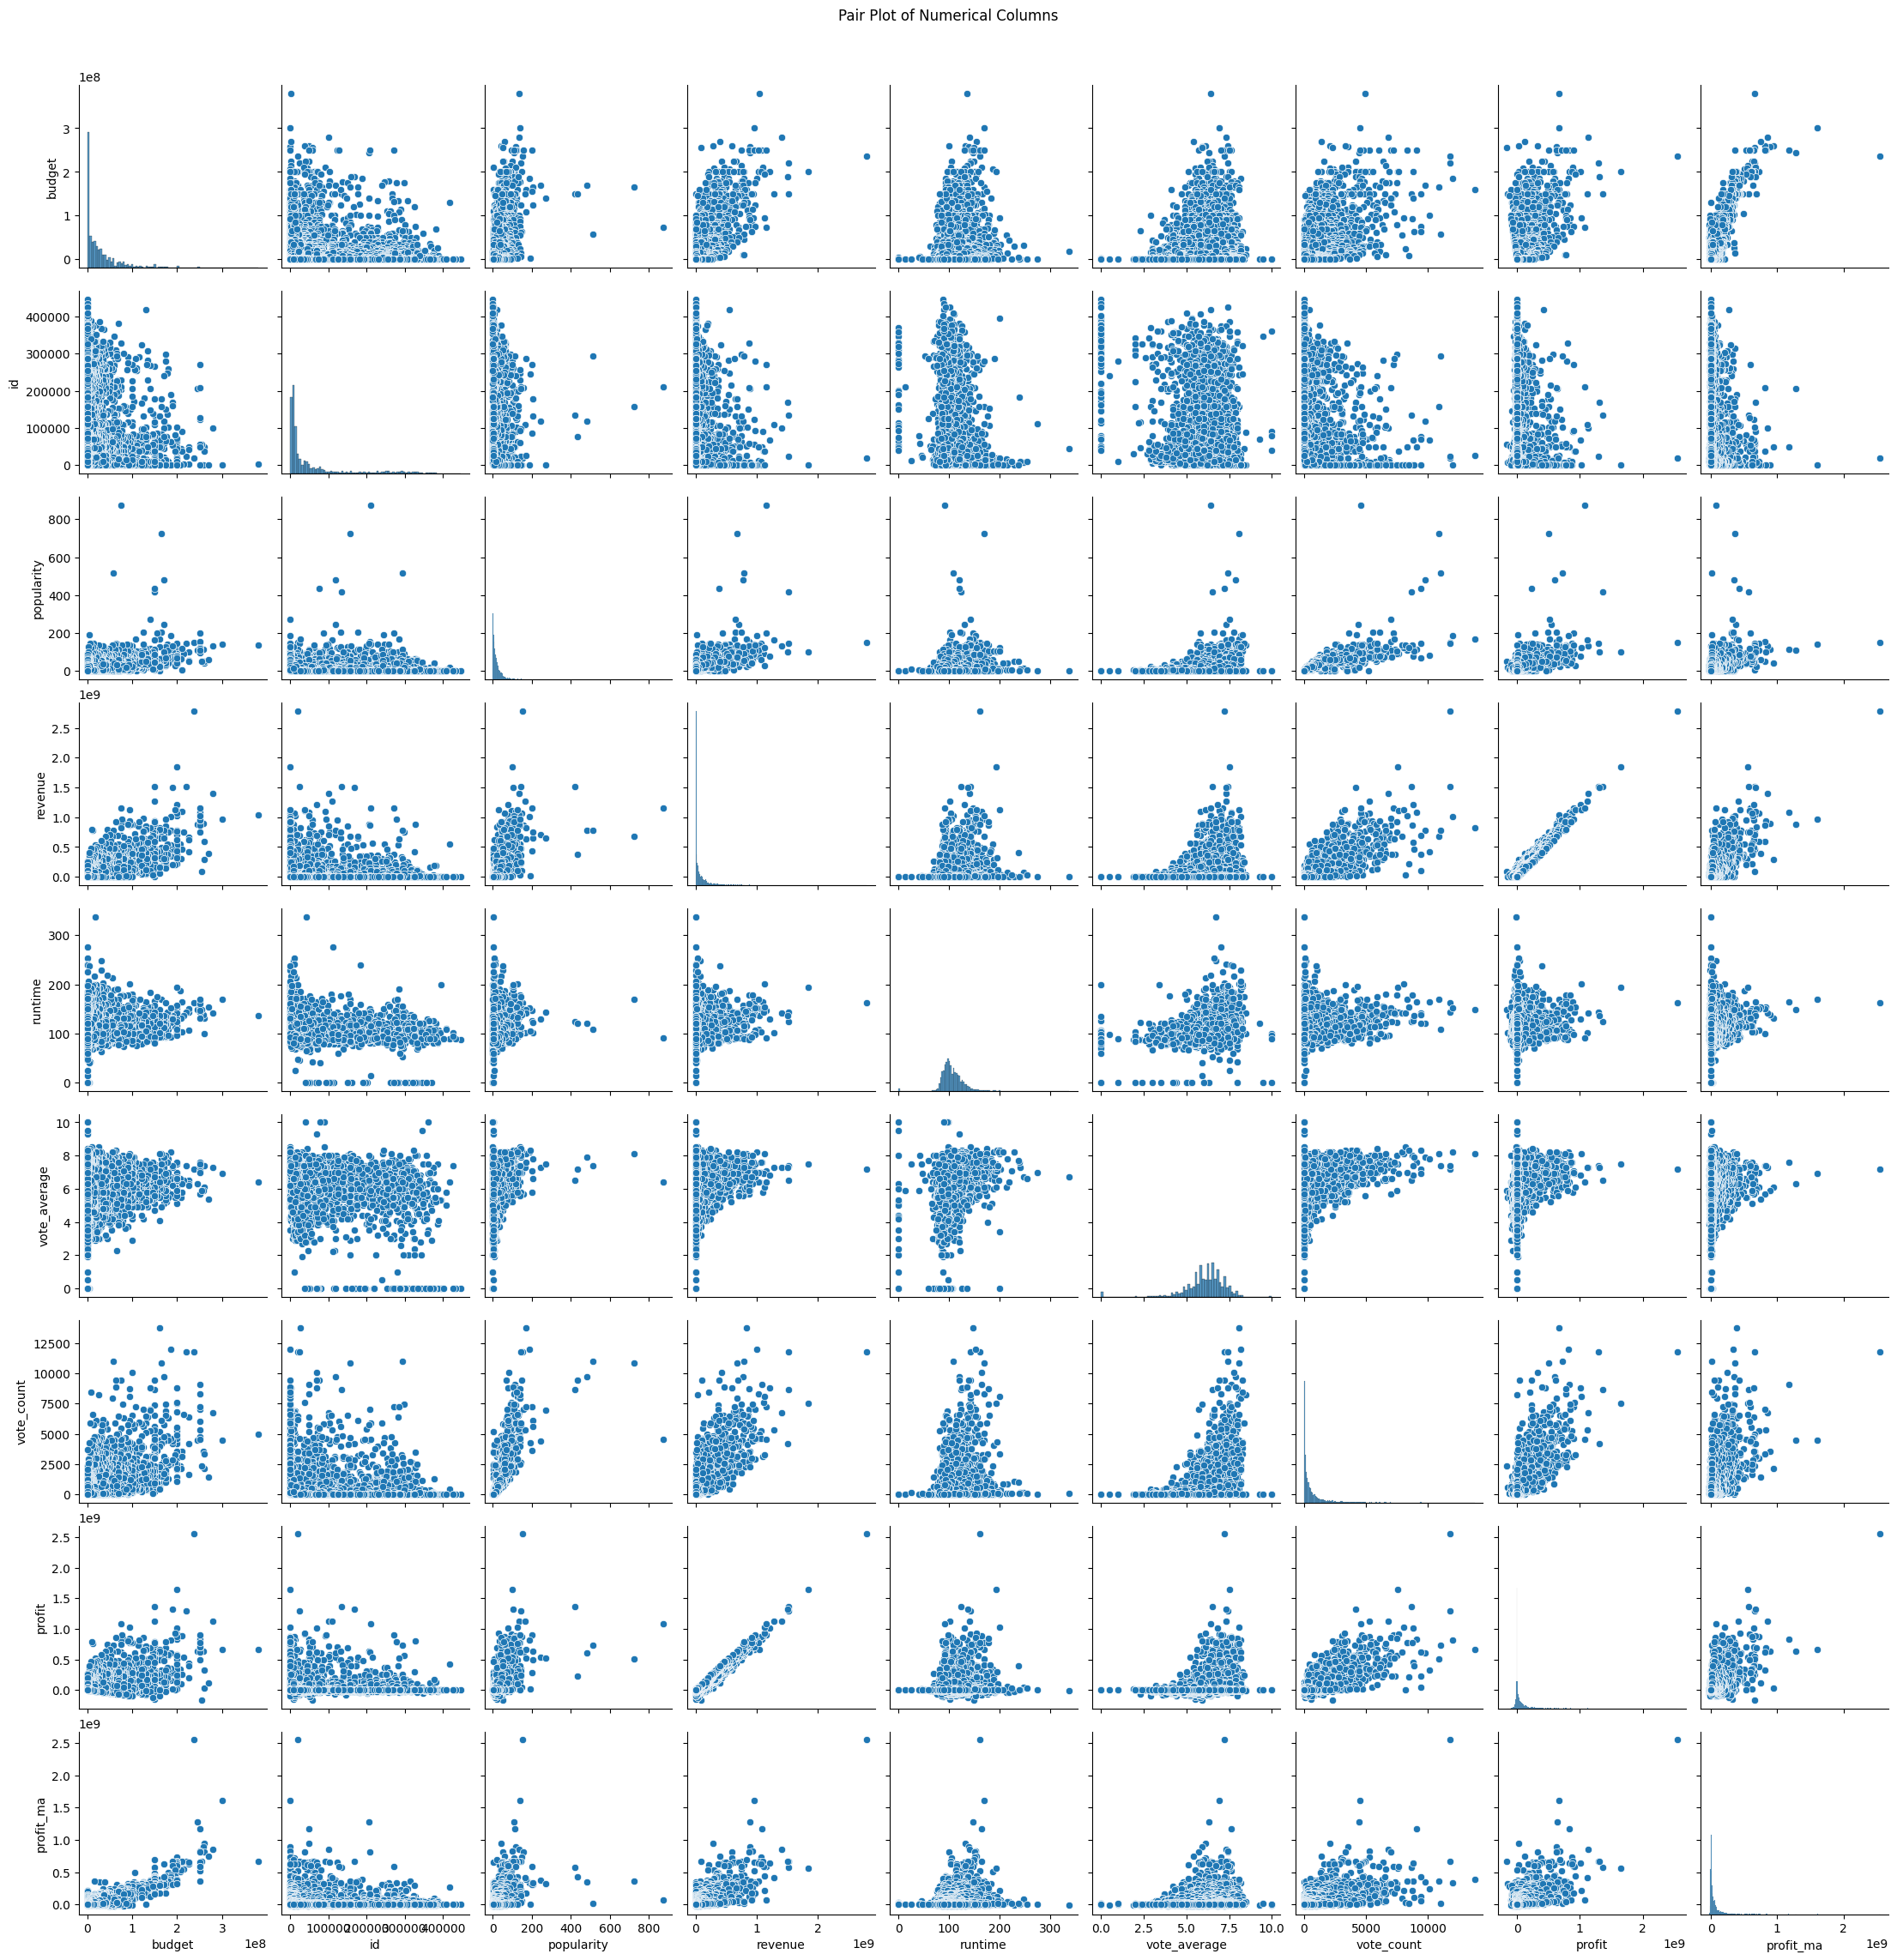

In [165]:
# Creating pair plot
sns.pairplot(numerical_columns)
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()